In [1]:
from bunkatopics import BunkaTopics
import pandas as pd


data = pd.read_csv("data/imdb.csv", index_col=[0])
data = data.sample(3000, random_state=42)


model = BunkaTopics(
    data,  # dataFrame
    text_var="description",  # Text Columns
    index_var="imdb",  # Index Column (Mandatory)
    extract_terms=True,  # extract Terms ?
    terms_embeddings=False,  # extract terms Embeddings?
    docs_embeddings=False,  # extract Docs Embeddings?
    embeddings_model="distiluse-base-multilingual-cased-v1",  # Chose an embeddings Model
    multiprocessing=True,  # Multiprocessing of Embeddings
    language="en",  # Chose between English "en" and French "fr"
    sample_size_terms=len(data),
    terms_limit=10000,  # Top Terms to Output
    terms_ents=True,  # Extract entities
    terms_ngrams=(1, 2),  # Chose Ngrams to extract
    terms_ncs=True,  # Extract Noun Chunks
    terms_include_pos=["NOUN", "PROPN", "ADJ"],  # Include Part-of-Speech
    terms_include_types=["PERSON", "ORG"],
)  # Include Entity Types

# Extract the topics


2022-06-27 14:50:37,433 - Extracting Terms...
2022-06-27 14:50:37,803 - loaded 'en_core_web_sm' spaCy language pipeline
100%|█████████████████████████████████████████████████████████████████████████████████████████████| 2990/2990 [00:20<00:00, 143.56it/s]


In [2]:
model.docs_embeddings = pd.read_csv('test/docs_embeddings.csv', index_col = [0])
model.docs_embeddings.columns = model.docs_embeddings.columns.astype(int)

In [3]:
topics = model.get_clusters(
    topic_number=15,  # Number of Topics
    top_terms_included=1000,  # Compute the specific terms from the top n terms
    top_terms=5,  # Most specific Terms to describe the topics
    term_type="lemma",  # Use "lemma" of "text"
    ngrams=[1, 2],
    clusterer = 'kmeans'
)  # N-grams for Topic Representation


In [12]:
res = model.get_centroid_documents(top_elements=2)
res

clusters  \
0   11 - family | christmas | summer | christmas e...   
1      8 - war | world war | war ii | ii | resistance   
2   1 - mother | daughter | young woman | young | ...   
3   4 - teacher | school | student | high school |...   
4   9 - wife | husband | married | married couple ...   
5   12 - hollywood | star | actress | producer | m...   
6     3 - football | coach | player | team | baseball   
7   10 - love | relationship | love story | woman ...   
8    2 - agent | terrorist | james bond | james | cia   
9     7 - alien | earth | planet | scientist | animal   
10  0 - police | cop | bank | criminal | police of...   
11     5 - virus | island | isolated | remote | group   
12    14 - story | legendary | rivalry | look | music   
13  6 - murder | killer | serial killer | serial |...   
14   13 - king | vampire | dracula | throne | kingdom   

                                        centroid_docs  \
0   Three teens discover that their neighbor's hou...   
1   Bosnia and Herzegovina during 1993 at the time...   
2   After a harsh childhood, orphan Jane Eyre is h...   
3   An artist gets a job at a beachside sandwich s...   
4   A young married couple's lives are thrown into...   
5   A comedy set in a world where no one has ever ...   
6   Elwood must reunite the old band, with a few n...   
7   Take two rival television reporters: one hands...   
8   A man wrongly convicted of conspiracy to commi...   
9   Mike and Reggie continue to hunt the mysteriou...   
10  Armed men hijack a New York City subway train,...   
11  After the events at Lake Victoria, the pre-his...   
12  The life and career of legendary comedian || T...   
13  A man who escapes from the vicious grips of th...   
14  A desert warrior rises up against the evil arm...   

                                           farest_doc  cluster_radius  
0   Three friends discover their new flatmate dead...        1.755470  
1   In the southeast region of Turkey, the Altun f...        1.868958  
2   In this allegorical story, a revolution led by...        1.509532  
3   1960s Turkey countryside. A newly assigned tea...        1.794710  
4   Sailors want to remain in their small world, w...        1.565614  
5   The lives of several individuals intertwine as...        1.943433  
6   A satire set in the contemporary art world sce...        1.419450  
7   The affair between King Edward VIII and Americ...        1.548671  
8   Two ex-government agents turned rival industri...        1.917263  
9   A Cinderella meets her Prince Charming on the ...        1.453486  
10  The sudden fortune won from a lottery fans suc...        1.743674  
11  Three friends are on the verge of getting thei...        2.000129  
12  Four independent stories set in modern China a...        1.222281  
13  3 women are sent to intercept a major drug dea...        2.121446  
14  An account of the romance between the Maratha ...        1.800385

UMAP(random_state=42, verbose=True)
Mon Jun 27 14:51:54 2022 Construct fuzzy simplicial set
Mon Jun 27 14:51:57 2022 Finding Nearest Neighbors
Mon Jun 27 14:51:58 2022 Finished Nearest Neighbor Search
Mon Jun 27 14:51:59 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Jun 27 14:52:05 2022 Finished embedding


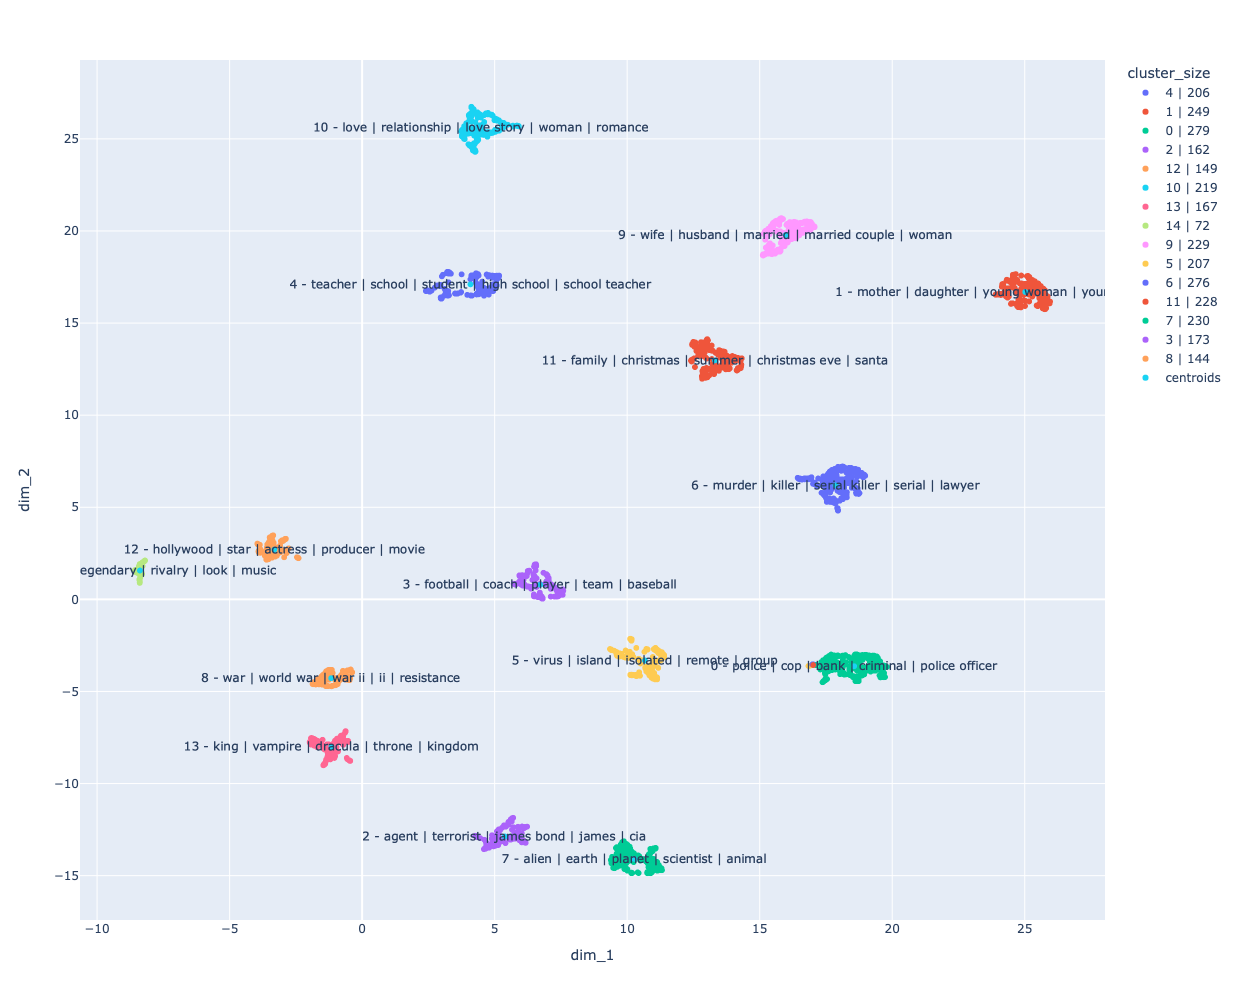

In [11]:
# Visualize the clusters. It is adviced to choose less that 5 terms - top_terms = 5 - to avoid overchanging the Figure

fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=True, density_plot=False)
fig.show()

UMAP(random_state=42, verbose=True)
Sat Jun 25 10:33:52 2022 Construct fuzzy simplicial set
Sat Jun 25 10:33:52 2022 Finding Nearest Neighbors
Sat Jun 25 10:33:52 2022 Finished Nearest Neighbor Search
Sat Jun 25 10:33:52 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 10:33:55 2022 Finished embedding


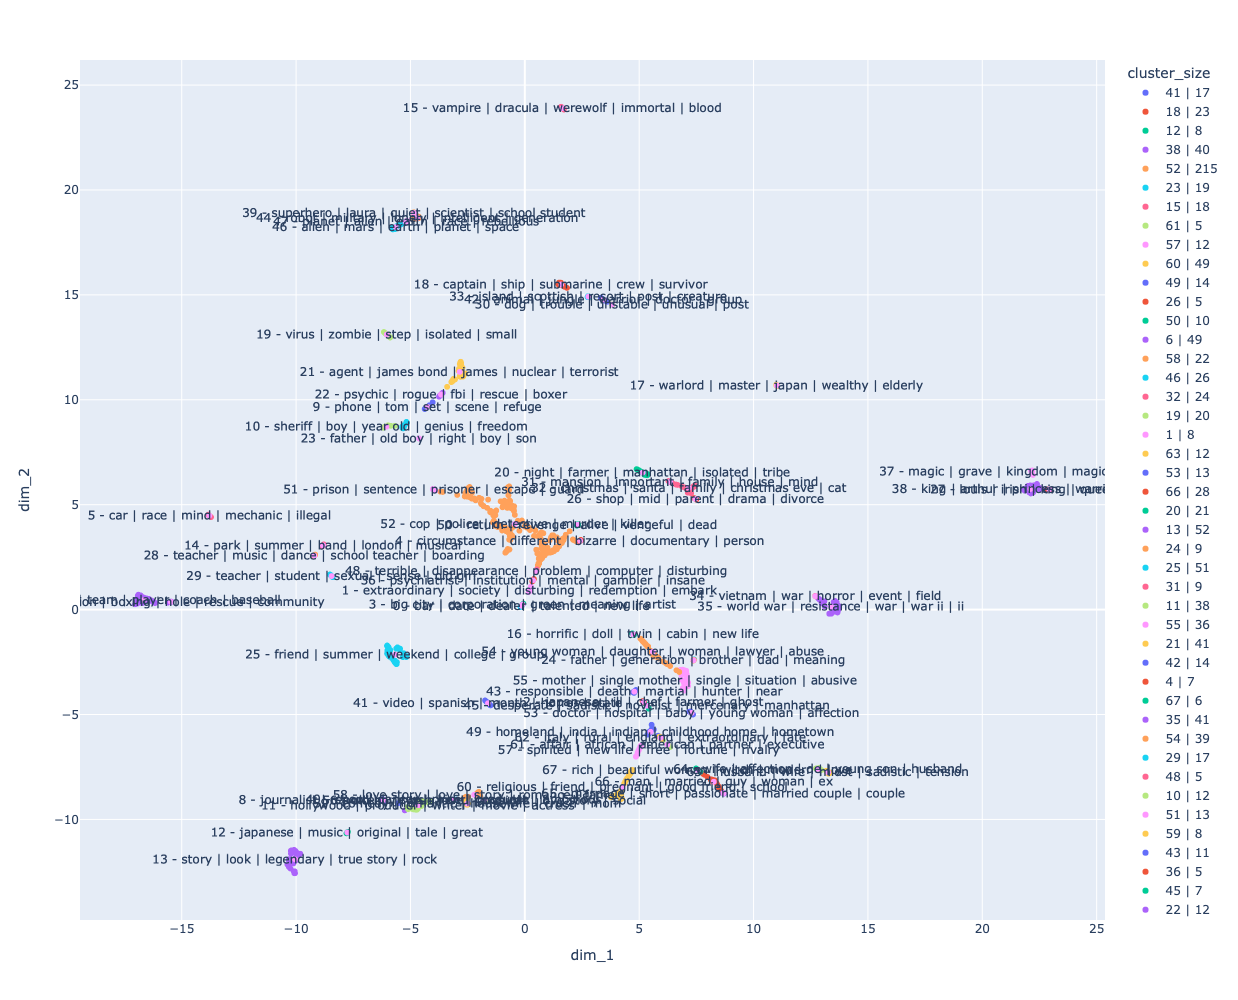

In [8]:
fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=False, density_plot=False)
fig.show()

UMAP(random_state=42, verbose=True)
Sat Jun 25 10:34:13 2022 Construct fuzzy simplicial set
Sat Jun 25 10:34:13 2022 Finding Nearest Neighbors
Sat Jun 25 10:34:13 2022 Finished Nearest Neighbor Search
Sat Jun 25 10:34:13 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 10:34:28 2022 Finished embedding


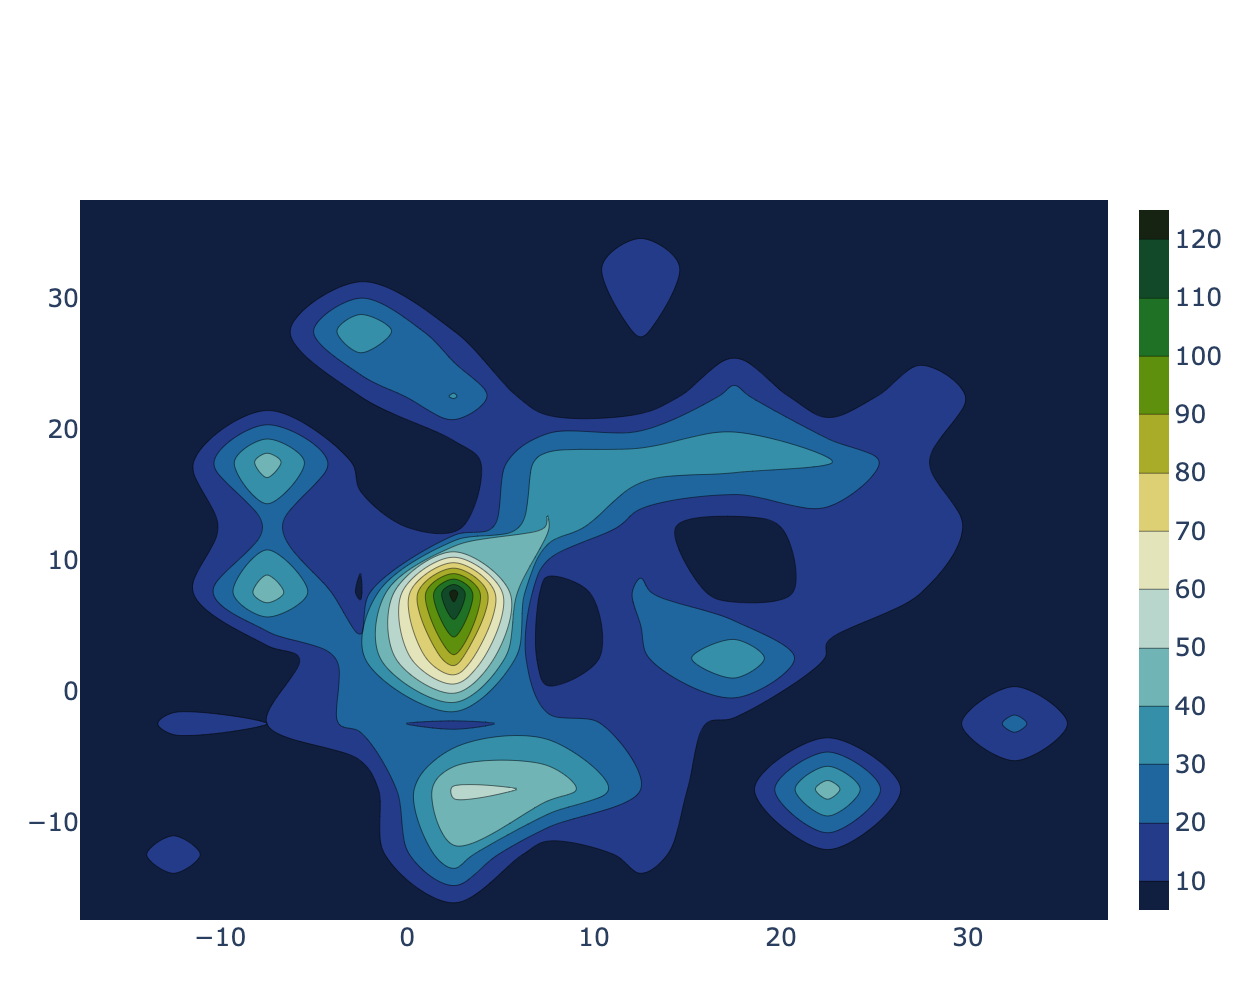

In [9]:
fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=True, density_plot=True)
fig.show()

UMAP(random_state=42, verbose=True)
Sat Jun 25 10:34:44 2022 Construct fuzzy simplicial set
Sat Jun 25 10:34:45 2022 Finding Nearest Neighbors
Sat Jun 25 10:34:45 2022 Finished Nearest Neighbor Search
Sat Jun 25 10:34:45 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Jun 25 10:34:47 2022 Finished embedding


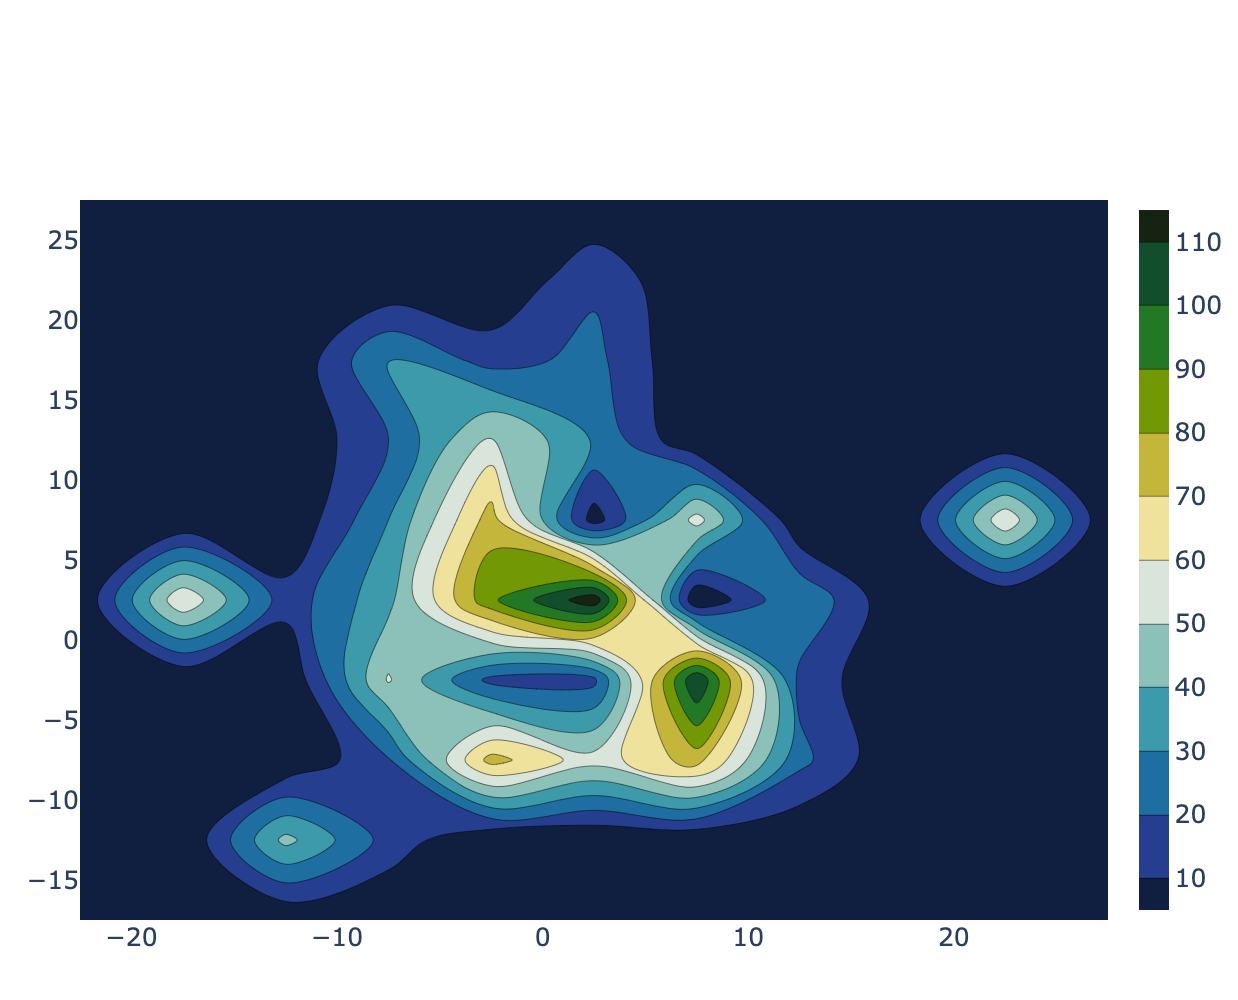

In [10]:
fig = model.visualize_clusters(search=None, width=1000, height=1000, fit_clusters=False, density_plot=True)
fig.show()